In [1]:
import pandas as pd

In [2]:
#Download data from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/download
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.drop(['id','Unnamed: 32'],axis=1, inplace=True)

In [6]:
#Target variable: Benign=B / Malignant=M
features = data.drop('diagnosis', axis=1)
target = data['diagnosis']
pc_names={0:'PC1', 1:'PC2', 2:'PC3', 3:'PC4', 4:'PC5'}

Populating the interactive namespace from numpy and matplotlib


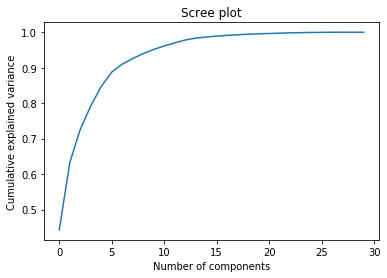

/Users/mikaelapisanileal/Projects/healthcare/process_PCA.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


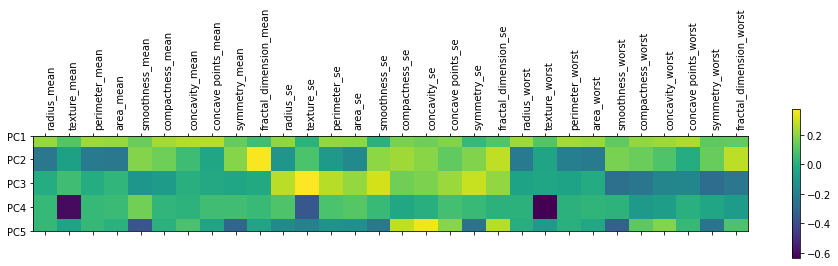

In [7]:
#PCA
%pylab inline
import process_PCA as p
pca, new_df = p.get_PCA(features)

/Users/mikaelapisanileal/Projects/healthcare/process_PCA.py:109: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  plt.scatter(xs * scalex,ys * scaley, c = df[colname])


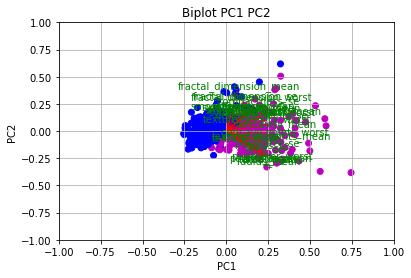

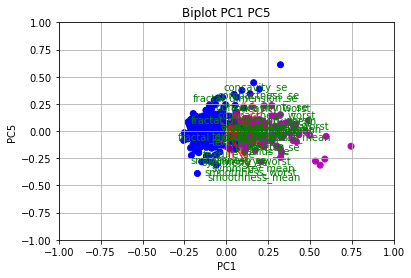

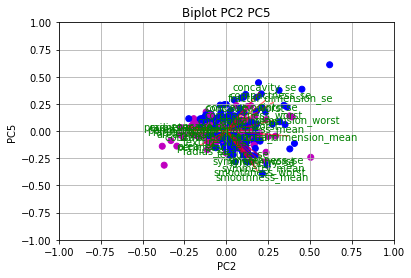

In [8]:
p.generate_biplot_plots(features, new_df, [0,1,4], pc_names, pca.components_, target, 'diagnosis', features.columns)

import matplotlib.pyplot as plt
import numpy as np    
cdict={'M':'red','B':'green'} #colors
labels={'M':'Malignant','B':'Benign'} #categories 
marker={'M':'*','B':'o'} #markers
alpha={'M':.5, 'B':.5} #desinty
s=40 #size
#draw all graphs: p.generate_color_classes_plots(list(range(0,new_df.shape[1])), pc_names, new_df, target, cdict, labels, marker, alpha, s)
#draw specific principal componentes
p.generate_color_classes_plots([0,3,1], pc_names, 
                               new_df, target, cdict, labels, marker, alpha, s)